In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

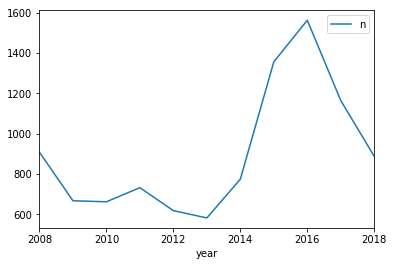

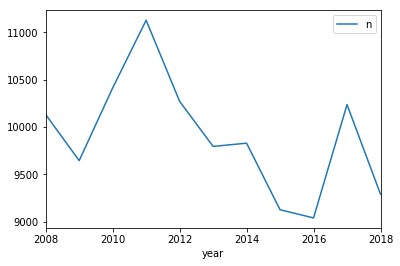

In [3]:
join_attention = pd.read_csv('../data/raw/total_newsattention.csv')
df = pd.read_csv('../data/raw/attention_for_minorities_and_sexualthreat.csv')

df_yearly = df.groupby('year', as_index=False).agg({'n': sum})
df_yearly.groupby('year').agg({'n': sum}).plot()

df = pd.read_csv('../data/raw/attention_for_sexualthreat.csv')

df_yearly_totalsex = df.groupby('year', as_index=False).agg({'n': sum})
df_yearly_totalsex.groupby('year').agg({'n': sum}).plot()


In [4]:
com = pd.merge(df_yearly, df_yearly_totalsex, how='inner', on='year')

com.rename(columns={'n_x': 'minorities', 'n_y': 'sexual assualt'}, inplace=True)

combined = pd.merge(com, join_attention, how='inner', on='year')
combined['relative'] =  combined['minorities'] / combined['total_attention']  * 100
combined['sexaul relative'] =  combined['sexual assualt'] / 5

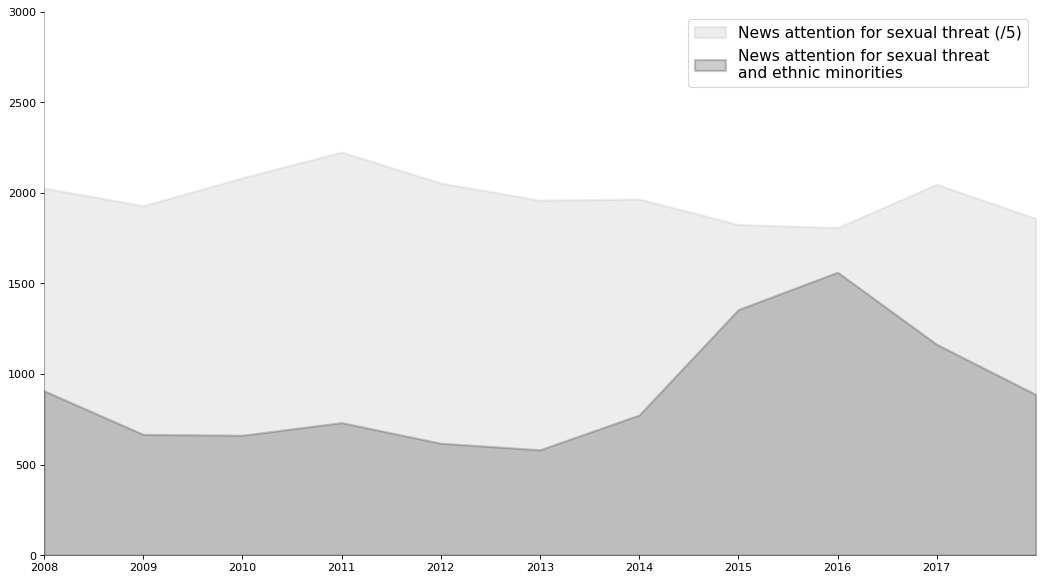

In [5]:
# Prepare Data
x = combined['year'].values.tolist()
y1 = combined['sexaul relative'].values.tolist()
y2 = combined['minorities'].values.tolist()
y3 = combined['relative'].values.tolist()
mycolors = ['black','gray', 'darkgray', 'tab:grey',  'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['News attention for sexual threat \nand ethnic minorities', 'News attention for sexual threat (/5)']

# Draw Plot 
fig, ax1 = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax1.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.2, color=mycolors[2], linewidth=2)
ax1.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.2, color=mycolors[0], linewidth=2)

# Plot Line2 (Right Y Axis)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.plot(x, y3, color='black', linestyle= ':', linewidth = 4)

# Decorations
#ax1.set_title('Absolute and relative attention for sexual abuse in Dutch news', fontsize=18)
#ax1.set_ylabel("Attention", color='black', fontsize=20)
ax1.set(ylim=[0.0, 3000.0])
ax1.legend(loc='best', fontsize=14)
plt.xticks(fontsize=10, horizontalalignment='center')
plt.xticks(np.arange(min(x), max(x), 1.0))
#plt.yticks(np.arange(2.5, 200000), fontsize=10)
plt.xlim(2008, 2018)


# ax2 (right Y axis)
#ax2.set_ylabel("Relative attention (% of total news coverage)", color='black', fontsize=20)
#ax2.tick_params(axis='y', labelcolor='black')
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
#ax2.set(ylim=(0, 1.20))


# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()
